# Análsis Exploraotio de precios de compras y ventas Supermercado La Osa - Madrid

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Datos de compras y ventas de productos

### Importamos los datasets

In [5]:
#Datasets de compra de productos a proveedores 2021-2022
df= pd.read_csv("data_compra_venta_2021_2022_LaOsa.csv")
df

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_14707/225709479.py:2: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_compra_venta_2021_2022_LaOsa.csv")


,ID_producto,Nombre_producto,Categoria_producto,Tipo_producto,Proveedor_producto,Fecha_compra,Coste_compra,Cantidad_venta,Precio_medio_venta,Fecha_venta,Año_venta,Mes_venta
0,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 21:10:50,0.15,NaN,NaN,NaN,NaN,NaN
1,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 20:25:26,0.15,NaN,NaN,NaN,NaN,NaN
2,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-29 18:47:47,0.15,NaN,NaN,NaN,NaN,NaN
3,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-28 19:37:37,0.15,NaN,NaN,NaN,NaN,NaN
4,1637.0,Envase Veer 33cl,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",Eco,(VEER) MISSON S.COOP.CYL.,2022-06-28 19:32:07,0.15,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
266975,6499.0,Pularda Sanchonar aprox 3 kg,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2022-08-30,2022.0,8.0
266976,6499.0,Pularda Sanchonar aprox 3 kg,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2022-09-30,2022.0,9.0
266977,6499.0,Pularda Sanchonar aprox 3 kg,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2022-10-30,2022.0,10.0
266978,6499.0,Pularda Sanchonar aprox 3 kg,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2022-11-30,2022.0,11.0


In [6]:
df.columns

Index(['ID_producto', 'Nombre_producto', 'Categoria_producto', 'Tipo_producto',
       'Proveedor_producto', 'Fecha_compra', 'Coste_compra', 'Cantidad_venta',
       'Precio_medio_venta', 'Fecha_venta', 'Año_venta', 'Mes_venta'],
      dtype='object')

> #### Las columnas o variables:

* ID_producto
* Nombre_producto
* Categoria_producto
* Tipo_producto
* Proveedor_producto
* Fecha_compra
* Coste_compra
* Cantidad_venta
* Precio_medio_venta
* Fecha_venta
* Año_venta
* Mes_venta

In [7]:
df.describe()

,ID_producto,Coste_compra,Cantidad_venta,Precio_medio_venta,Año_venta,Mes_venta
count,204988.000000,111268.000000,93720.000000,93720.000000,93720.000000,93720.000000
mean,2969.931430,2.963484,7.263024,2.808527,2021.503713,6.500000
std,1730.063218,3.425243,34.071630,4.433429,0.499989,3.452071
min,5.000000,0.000000,-24.000000,0.000000,2021.000000,1.000000
25%,1342.000000,1.350000,0.000000,0.000000,2021.000000,3.750000
50%,3056.000000,2.010000,2.000000,1.850000,2022.000000,6.500000
75%,4347.000000,3.100000,7.000000,3.600000,2022.000000,9.250000
max,6518.000000,156.000000,2959.000000,128.050000,2022.000000,12.000000


In [8]:
df.dtypes

ID_producto           float64
Nombre_producto        object
Categoria_producto     object
Tipo_producto          object
Proveedor_producto     object
Fecha_compra           object
Coste_compra          float64
Cantidad_venta        float64
Precio_medio_venta    float64
Fecha_venta            object
Año_venta             float64
Mes_venta             float64
dtype: object

In [ ]:
compras_2021_2022.ID_producto = compras_2021_2022.ID_producto.astype('object')

In [16]:
df.ID_producto = df.ID_producto.astype('object')
df.dtypes

ID_producto            object
Nombre_producto        object
Categoria_producto     object
Tipo_producto          object
Proveedor_producto     object
Fecha_compra           object
Coste_compra          float64
Cantidad_venta        float64
Precio_medio_venta    float64
Fecha_venta            object
Año_venta             float64
Mes_venta             float64
dtype: object

In [21]:
df.groupby('Tipo_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_14707/1425067881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tipo_producto').sum()


,Coste_compra,Cantidad_venta,Precio_medio_venta,Año_venta,Mes_venta
Tipo_producto,,,,,
Convencional,81580.81,0.0,0.0,0.0,0.0
Eco,241699.63,0.0,0.0,0.0,0.0
False,6460.48,0.0,0.0,0.0,0.0


In [ ]:
### Quien es False?

In [22]:
df.groupby('Categoria_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_14707/3904953780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Categoria_producto').sum()


,Coste_compra,Cantidad_venta,Precio_medio_venta,Año_venta,Mes_venta
Categoria_producto,,,,,
All,0.00,0.0,0.0,0.0,0.0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Acccesorios de limpieza",723.35,0.0,0.0,0.0,0.0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Insecticidas",25.97,0.0,0.0,0.0,0.0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Jabón y detergente",1329.04,0.0,0.0,0.0,0.0
"Droguería, Perfumería, Limpieza, Higiene, Hogar / Droguería / Otros",302.90,0.0,0.0,0.0,0.0
...,...,...,...,...,...
"Seco Envasado / Vinos, cervezas, sidras / Sidras",446.73,0.0,0.0,0.0,0.0
"Seco Envasado / Vinos, cervezas, sidras / Vinos",4088.51,0.0,0.0,0.0,0.0
"Seco Envasado / Zumos, leche y bebidas vegetales / Bebidas vegetales",1934.44,0.0,0.0,0.0,0.0


In [33]:
df.Categoria_producto.value_counts()

Fruta y Verdura / Verdura / Verdura de cocinar                                                   7689
Resto Producto Fresco / Panadería y bollería salada / Pan                                        7571
Resto Producto Fresco / Leche, zumos, productos lácteos / Yogures y postres                      6830
Seco Envasado / Panes, harinas / Panes industriales                                              4071
Fruta y Verdura / Fruta / Fruta de pepita                                                        3473
                                                                                                 ... 
Granel / Granel droguería, perfumería, limpieza, higiene y hogar / Higiene – Higiene corporal       5
Fruta y Verdura / Fruta / Otras frutas                                                              5
Granel / Granel salado / Pastas y sémolas                                                           4
Seco Envasado / Alimentación e higiene infantil / Infusiones                      

In [ ]:
### Hay que borrar la categoria all

In [23]:
df.groupby('Nombre_producto').sum()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_14707/3533091251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Nombre_producto').sum()


,Coste_compra,Cantidad_venta,Precio_medio_venta,Año_venta,Mes_venta
Nombre_producto,,,,,
AJUSTE 31/12/20,0.00,0.000,0.000000,0.0,0.0
Abrillantador Finish 500 ml,13.98,24.000,82.200000,48516.0,156.0
Abrillantador lavavajillas Ecodoo 500 ml,14.28,53.000,100.225000,48516.0,156.0
Acedía grande limpia y entera,38.00,0.000,0.000000,0.0,0.0
Aceite caléndula y almendras Piel sana 100 ml,44.64,5.000,37.500000,24252.0,78.0
...,...,...,...,...,...
patata roja AgroEc.,37.50,215.294,13.500000,48516.0,156.0
proteina de guisante texturizada Vegetalia 250g,2.24,11.000,6.300000,24264.0,78.0
tomate seco unidad AgroEc,66.53,134.000,21.488106,48516.0,156.0


In [ ]:
### Hay que chequear el nombre de producto AJUSTE 31

In [25]:
df.Nombre_producto.value_counts()

Envase Veer 33cl                                        858
Pan integral de espelta El árbol del pan 500 gr         758
Pan integral de trigo El árbol del pan 500 gr           755
Pan de cereales con semillas El árbol del pan 500 gr    752
Pan blanco de trigo El árbol del pan 500 gr             748
                                                       ... 
Bio Tamari . (Salsa De Soja) Vegetalia 250 Ml.            1
Espirulina Vegetalia 120 Comprimidos.                     1
Picles Variada Vegetalia 320g.                            1
Picles Col Blanca Vegetalia 300g.                         1
Miel roble Miel antonio simón 1 Kg                        1
Name: Nombre_producto, Length: 4867, dtype: int64

In [32]:
df.isnull().sum()

ID_producto            61992
Nombre_producto        61992
Categoria_producto    155712
Tipo_producto         155712
Proveedor_producto     93720
Fecha_compra          155712
Coste_compra          155712
Cantidad_venta        173260
Precio_medio_venta    173260
Fecha_venta           173260
Año_venta             173260
Mes_venta             173260
dtype: int64

In [39]:
df.dtypes

ID_producto                   object
Nombre_producto               object
Categoria_producto            object
Tipo_producto                 object
Proveedor_producto            object
Fecha_compra          datetime64[ns]
Coste_compra                 float64
Cantidad_venta               float64
Precio_medio_venta           float64
Fecha_venta           datetime64[ns]
Año_venta                    float64
Mes_venta                    float64
dtype: object

In [35]:
df['Fecha_venta'] = pd.to_datetime(df['Fecha_venta'])

In [36]:
df['Fecha_compra'] = pd.to_datetime(df['Fecha_compra'])

/Users/stephanievalderramacarmona/miniconda3/envs/osa/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/stephanievalderramacarmona/miniconda3/envs/osa/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Cantidad_venta', ylabel='Count'>

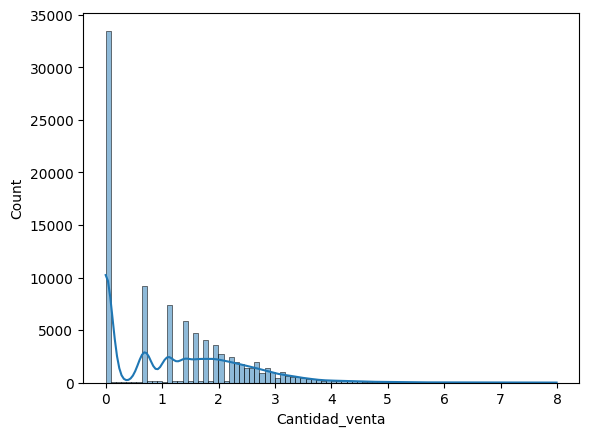

In [41]:
sns.histplot(np.log1p(df['Cantidad_venta']), kde=True)

<Axes: xlabel='Precio_medio_venta', ylabel='Count'>

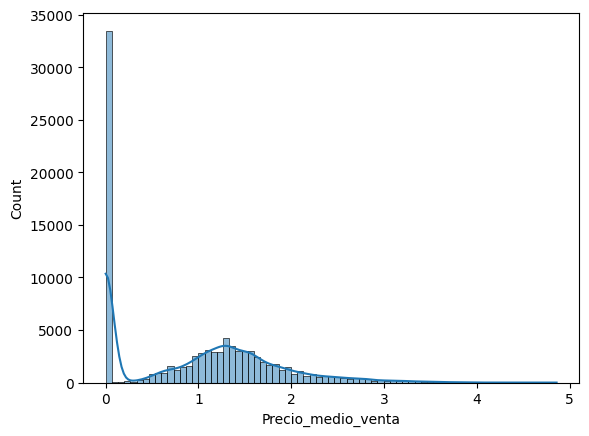

In [44]:
sns.histplot(np.log1p(df['Precio_medio_venta']), kde=True)

<Axes: xlabel='Coste_compra', ylabel='Count'>

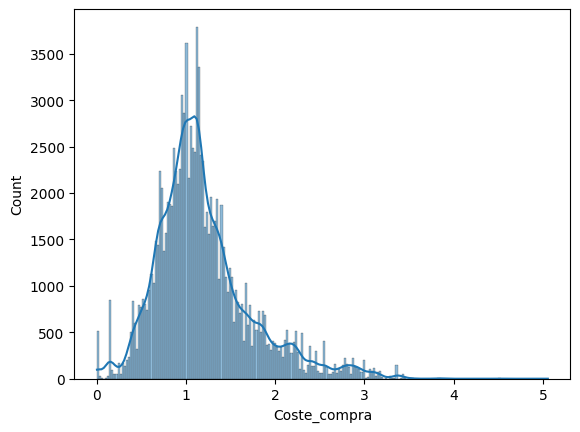

In [45]:
sns.histplot(np.log1p(df['Coste_compra']), kde=True)

### Visualizacion de los datos

## Tal vez hay que convertir el tipo de producto en codigos:

**1--> Eco**

**2-->Convencional**

**3--->False** -->revisar que significa esto de de False

In [46]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))

ID_producto --------------------------> 4851
Nombre_producto --------------------------> 4867
Categoria_producto --------------------------> 131
Tipo_producto --------------------------> 3
Proveedor_producto --------------------------> 132
Fecha_compra --------------------------> 9026
Coste_compra --------------------------> 1373
Cantidad_venta --------------------------> 4840
Precio_medio_venta --------------------------> 4070
Fecha_venta --------------------------> 24
Año_venta --------------------------> 2
Mes_venta --------------------------> 12


In [40]:
product_type_sales_per_month = df.groupby(['Fecha_venta', 'Tipo_producto']).aggregate({'Cantidad_venta': 'sum'}).unstack().resample('1M').sum()
product_type_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("product_type_sales_per_month")

TypeError: no numeric data to plot

In [26]:
# Utilizando seaborn
'''sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')'''

"sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')\nplt.xlabel('Fecha')\nplt.ylabel('Coste')\nplt.title('Coste del producto a lo largo del tiempo')"

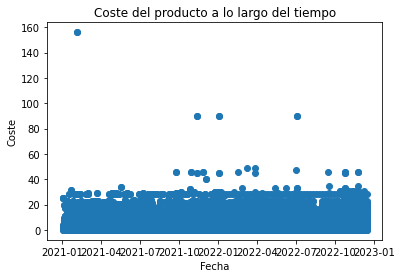

In [27]:
plt.scatter(precios_compra_2022['Fecha'], precios_compra_2022['Coste'])
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')
plt.show()

## ASPECTOS ESENCIALES
### 1. Analisis exploratorio de los datos
### 2. Visualizacion de los datos en una herramienta interactiva de facil utilizacion



## ASPECTOS OPCIONALES
### 1. Predecir los valores de venta y /o de inflacion para los siguiente meses (o año)
### 2. Analisis de series temporales 

## Asunciones de la primer reunión con el stakeholder
* #### ¿A que precio compra la OSA sus productos?
* #### ¿Hay algun producto, categoria o proveedor que los precios sean mas altos?
* #### ¿Cual es la implicacion en la canasta del comprador, la subida de precios de los productos que compra la Osa?
* #### Analizar los productos que mas se consumen en la cesta familiar y su precio (de compra y venta?)
* #### Variacion de los precios de cada producto y cada categoría
* #### ¿Cómo afecta esta variación de los productos en la compra de los usuarios?
* #### Agrupar las comnpras por tipos de productos, categorías, tipo de comprador

## Se rellenan todos los nulos de las ventas con ceros --> de acuerdo a la reunion con el stakeholder

nota: quitar corchetes y ceros de referencia interna para que queden igual a los de arriba